# Week 4 – Nonlinear Oscillators and Bifurcations

### Aim: Work through lectures 10–12.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import slicc_tools as st

## Lecture 10 – van der Pol Oscillator (p. 200–201 for introduction)

The governing (van der Pol) equation: $\ddot x + \mu \dot x (x^2 - 1) + x = 0$

This is essentially a SHO with a nonlinear damping term (linear for $x = 1$).

Using the Poincaré-Bendixson Theorem, we can prove that there exists a unique ($\exists!$), stable limit cycle for all $\mu > 0$.

We start by investigating the limits $\mu \gg 1$ and $\mu \ll 1$.

### Relaxation Oscillations $\mu \gg 1$ (ch. 7.5)

*Strongly nonlinear* limit.

The study of this limit involves a tricky change of variables called the *Liénard transformation*.
> Causes the limit cycle to approach a constant shape as $\mu \to \infty$.

Note: $\ddot x + \mu \dot x (x^2 - 1) = \frac{d}{dt}\left( \dot x + \mu \left(\frac{1}{3}x^3 - x \right) \right)$.

Let $w = \dot x + \mu F(x)$ where $F(x) = \frac{1}{3}x^3 - x$.

Then $\dot w = -x$ from the vdP (van der Pol) equation.
\
\
\
The system is then described by:

$\dot x = w - \mu F(x)$

$\dot w = -x$
\
\
\
The nullclines of the system are then given by:

$\dot x = 0$ when $w = \mu F(x) = \mu \left(\frac{1}{3}x^3 - x \right)$

$\dot w = 0$ when $x = 0$
\
\
\
We then rescale: $y = \frac{w}{\mu}$, so the governing equations become:

$\dot x = \mu \left( y - F(x) \right)$

$\dot y = -\frac{1}{\mu}x$

As $\mu \gg 1$, $\dot x \sim O(\mu)$ is very large outside the nullcline, while $\dot y \sim O \left(\frac{1}{\mu} \right)$ is very small.

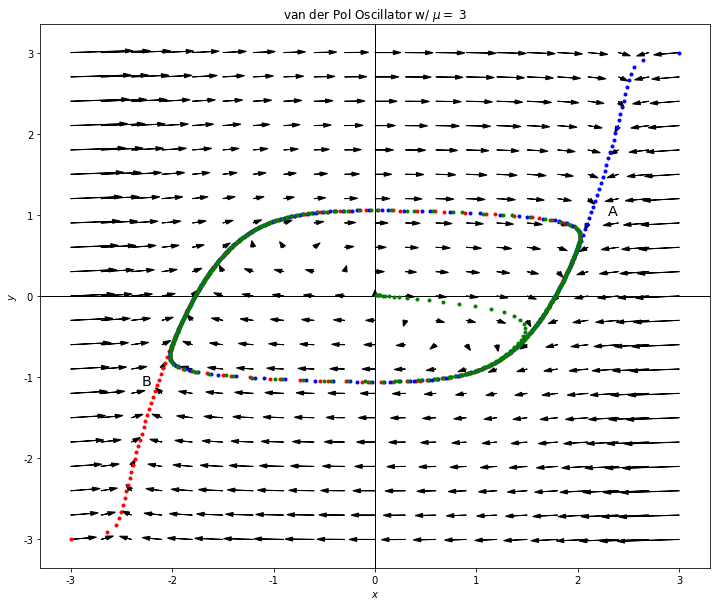

In [61]:
#Define the governing equations of the van der Pol oscillator
def van_der_pol(v):
    x, y = v[0], v[1]
    
    x_deriv = mu * (y - 1/3 * x**3 + x)
    y_deriv = - (1/mu) * x
    
    return np.array([x_deriv, y_deriv])

#Declare the value of the parameter mu
mu = 3

#Plot the direction field of the system
st.plot_direction_field(van_der_pol, -3, 3, 21)

#Plot three different trajectories of the system
st.plot_trajectory(van_der_pol, [-3, -3], 300)
st.plot_trajectory(van_der_pol, [3, 3], 300, c = 'b')
st.plot_trajectory(van_der_pol, [0.01, 0.01], 300, c = 'g')

plt.title(rf'van der Pol Oscillator w/ $\mu =$ {mu}')

plt.text(2.3, 1, 'A', size = 'x-large')
plt.text(-2.3, -1.1, 'B', size = 'x-large')

plt.show()

Above, the speed of the imaginary particles on the trajectories is given by the density of the graphed points. A higher density (as on the left and right regions) corresponds to a higher speed. We have also defined two points A and B to which we'll be referring later on.

We can also graph the system in waveform:

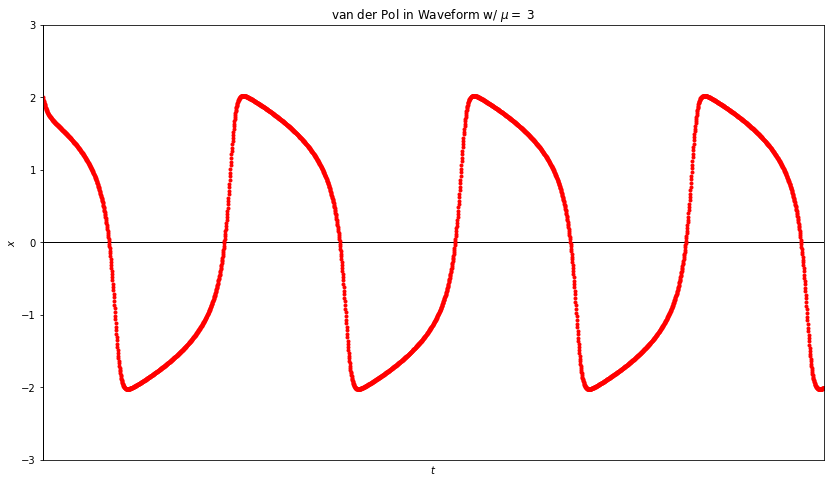

In [62]:
#Declare initial condition
v = [2, 0]

#Format figure
plt.figure(figsize=(14, 8))
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

#Plot the values of x for a defined time interval
for t in range(3000):
    #Plot the current condition
    plt.plot(t*0.1, v[0], 'o', ms = 3, c = 'r')
    
    #Retrieve the next condition using fourth-order Runge-Kutta
    v = st.runge_kutta(v, van_der_pol, dt = 0.01)

plt.title(rf'van der Pol in Waveform w/ $\mu =$ {mu}')
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')

plt.xlim([0, 300])
plt.ylim([-3, 3])

plt.xticks([], [])

plt.show()

In waveform, the system corresponds to a sawtooth wave, the period of which we want to estimate.

We know that the period is $T \sim 2 \times$ (time to go from A to B). Since $\mu \gg 1$, this is approximately the time required to travel along the *slow branches*, i.e. the fast jumps are neglected.

Then, $w \approx \mu F(x)$ and $T \approx 2 \int_{t_A}^{t_B}dt \approx 2 \int_{2}^{1}\frac{dt}{dw}\frac{dw}{dx}dx$ (chain rule + approximation of $x$ values from the first graph).

Here, $\dot w = -x$, so $\frac{1}{\dot w} = -\frac{1}{x}$ and $\frac{dw}{dx} \approx \frac{d}{dx} \left( \mu F(x) \right) = \mu F'(x) = \mu \frac{d}{dx} \left( \frac{x^3}{3} - x \right) = \mu \left( x^2 - 1 \right)$.

$\Rightarrow T \approx 2 \int_{2}^{1} \left( -\frac{1}{x} \mu \left( x^2 - 1 \right) \right) dx = 2 \mu \left( \frac{1}{2}x^2 - \ln{x} \right) \Big|_{1}^{2} = 2 \mu \left( \frac{3}{2} - \ln{2} \right) = O(\mu)$.

So the period $T$ is of the order $\mu$.

### Weakly Nonlinear van der Pol Oscillator $\mu \ll 1$ (ch. 7.6)

The van der Pol equation is of the form: $\ddot x + x + \varepsilon \dot x \left(x^2 - 1 \right) = 0$ where $0 \leq \varepsilon \ll 1$.

When $\varepsilon = 0$, the system is a harmonic oscillator.

$\Rightarrow$ All orbits of the system are circular with a period $2\pi$, i.e. $x(t) = A \cos{t}$ where $A = $ constant.

For small $\varepsilon$, we expect all orbits to be nearly circular with approximate period of $2\pi$.
> How to find the limit cycle and its amplitude?

**Method 1**: Look at the change in energy $\Delta E$ per one cycle. We expect $\Delta E = 0$ on the limit cycle.
> Other trajectories have $\Delta E > 0$ or $\Delta E < 0$.

In a dimensionless formulation: $E = \frac{1}{2}x^2 + \frac{1}{2} \dot x^2$, so $\frac{dE}{dt} = x \dot x + \dot x \ddot x = \dot x \left( x + \ddot x \right) = \dot x \left(-\varepsilon \dot x \left( x^2 - 1 \right) \right)$ from the van der Pol equation.

Now, suppose $x = A \cos{t} + O(\varepsilon)$ where $A$ is a constant to be determined and $O(\varepsilon)$ is a small correction $\Rightarrow \dot x = -A\sin{t} + O(\varepsilon)$.

$\Delta E = \int_0^T \frac{dE}{dt} dt = - \varepsilon \int_0^{2\pi + O(\varepsilon)} A^2 \sin^2{t} \left( A^2 \cos^2{t} - 1 \right) dt + O \left( \varepsilon^2 \right)$.

Then, neglecting the $O(\varepsilon)$ term in the integration limits, we get $\Delta E = -\varepsilon \left[ A^4 \langle \sin^2{t} \cos^2{t} \rangle 2\pi - A^2 \langle \sin^2{t} \rangle 2\pi \right] = -2\pi A^2 \left(\frac{A^2}{8} - \frac{1}{2} \right) + O \left( \varepsilon^2 \right)$.

Thus, $\Delta E = 0$ for $\frac{A^2}{8} = \frac{1}{2} \Rightarrow A = 2$, so $x(t) = 2 \cos{t} + O(\varepsilon)$.

## Lecture 11 – Averaging Theory for Weakly Nonlinear Oscillators (ch. 7.6 cont'd)

Strogatz (p. 217–229) presents the *two-timing method* which is fairly heavy in algebraic manipulation and will not be reproduced here. The lecture takes a slightly different approach (the method of averaging). Textbook exercise 7.6.25 also provides an introduction to this method.
> This material has wide applications in the study of dynamical systems!

Consider systems of the form $\ddot x + x + \varepsilon h \left(x, \dot x \right) = 0$ where $0 \leq \varepsilon \ll 1$ (perturbation of a harmonic oscillator).
> *Perturbation theory* will come up in QM courses in the future.

We may then write the governing equations as:

$\dot x = y$

$\dot y = - x - \varepsilon h \left(x, y \right)$

When $\varepsilon = 0$, the solutions are $x(t) = r \cos{(t + \phi)}$ and $y(t) = -r \sin{(t + \phi)}$ where the amplitude $r$ and phase angle $\phi$ are constant on trajectories.

When $\varepsilon \neq 0$, we expect slow drift of $r, \phi$, but the trajectories will stay nearly circular with a "period" of $2\pi$.

Now, let:

$x(t) = r(t) \cos{(t + \phi(t))}$

$y(t) = -r(t) \sin{(t + \phi(t))}$

$\Rightarrow$ View this as the definition of $r(t), \phi(t)$, i.e. $r(t) = \sqrt{x^2(t) + y^2(t)}$ and $\tan{(t + \phi(t))} = -\frac{y(t)}{x(t)}$.

Next, we need to find the equations for $\dot r, \dot \phi$:

$r^2 = x^2 + y^2 \Rightarrow r \dot r = x \dot x + y \dot y = xy + y(-x -\varepsilon h) = - \varepsilon y h = -\varepsilon h (-r\sin{(t + \phi)} \Rightarrow \dot r = \varepsilon h \sin{(t + \phi)}$.

Similarly, using $\frac{d}{dt}\left( t + \phi(t) \right) = \frac{d}{dt} \left( \tan^{-1}{\left(-\frac{y}{x}\right)} \right)$, we get $\dot \phi = \frac{\varepsilon h}{r} \cos{(t + \phi)}$ (CHECK THIS!).

Thus, both amplitude and phase vary slowly as expected, i.e. $\dot r \sim O(\varepsilon), \dot \phi \sim O(\varepsilon)$.

**Note**: $h = h(x, y) = h(r\cos{(t + \phi)}, -r\sin{(t + \phi)})$, so the system for $\dot r, \dot \phi$ is now *non-autonomous* due to the explicit time-dependence of function $h$.

We can then exploit the separation of time scales (fast oscillation vs. slow drift) to get information about the system $\Rightarrow$ average over one cycle of length $2\pi$ to "iron out" the fast oscillations.

Given $g(t)$, define average over one cycle about a point $t$ as $\bar g(t) = \langle g \rangle (t) = \frac{1}{2\pi} \int_{t - \pi}^{t + \pi} g(\tau) d\tau$ (running average).

Observe that $\dot{\bar{g}} = \bar{\dot{g}}$ since:

$\bar{\dot{g}} = \frac{1}{2\pi} \int_{t - \pi}{t + \pi} \frac{dg}{ds}ds = \frac{1}{2\pi} \left[ g(t + \pi) - g(t - \pi) \right]$

$\dot{\bar{g}} = \frac{d}{dt} \left[ \frac{1}{2\pi} \int_{t - \pi}^{t + \pi} g(s) ds \right] = \frac{1}{2\pi} \left[ g(t + \pi) - g(t - \pi) \right]$ by the Fundamental Theorem of Calculus.

Next, we need to derive the equations for $\bar r, \bar \phi$:

$\bar{\dot{r}} = \dot{\bar{r}} = \langle \varepsilon h \sin{(t + \phi)} \rangle_t$

$\bar{\dot{\phi}} = \dot{\bar{\phi}} = \langle \varepsilon \frac{h}{r} \cos{(t + \phi)} \rangle_t$

which are exact since the RHS depends on $r, \phi$ instead of $\bar r, \bar \phi$.

Over one cycle, $r = \bar{r} + O(\varepsilon)$ and $\phi = \bar{\phi} + O(\varepsilon)$ which we'll substitute into the equations above $\Rightarrow$ causes error $O \left(\varepsilon^2 \right)$ in the ODEs.
> This yields autonomous equations that we can analyse using geometric (phase plane) methods.

Note: $\bar{r}, \bar{\phi}$ are treated as constants in the averages $\langle \cdot \rangle_t$.

**Example**: van der Pol Oscillator $\ddot x + x + \varepsilon \dot x \left( x^2 - 1 \right) = 0$

Here $h = \dot x \left( x^2 - 1 \right) = y \left( x^2 - 1 \right) = - r \sin{(t + \phi)} \left[ r^2 \cos^2{(t + \phi)} - 1 \right] = - \bar{r} \sin{(t + \bar{\phi})} \left[ \bar{r}^2 \cos^2{(t + \bar{\phi})} - 1 \right] + O(\varepsilon)$.

$\Rightarrow \dot{\bar{r}} = \langle \varepsilon h \sin{(t + \bar{\phi})} \rangle + O \left( \varepsilon^2 \right) = \langle -\varepsilon \bar{r} \sin^2{(t + \bar{\phi})} \left[ \bar{r}^2 \cos^2{(t + \bar{\phi})} - 1 \right] \rangle + O \left(\varepsilon^2 \right) = -\varepsilon \bar{r} \left( \bar{r}^2 \langle \sin^2 \cos^2 \rangle - \langle \sin^2 \rangle \right) + O\left( \varepsilon^2 \right)$.

And we get $\dot{\bar{r}} = -\varepsilon \bar{r} \left( \frac{1}{8} \bar{r}^2 - \frac{1}{2} \right) + O \left( \varepsilon^2 \right) \approx \frac{\varepsilon \bar{r}}{8} \left( 4 - \bar{r}^2 \right)$ where we have neglected the error in the last step.

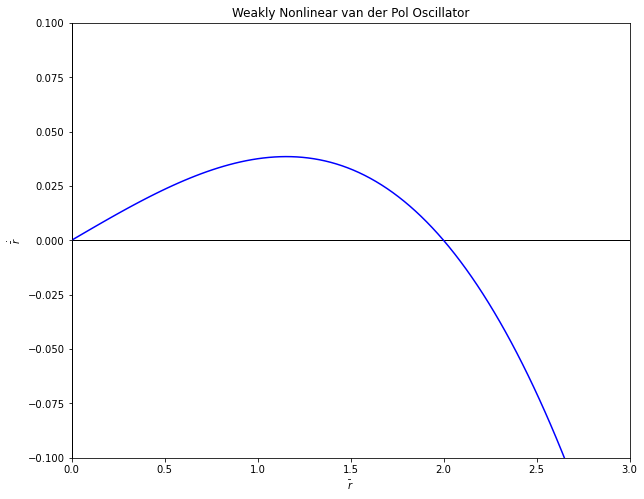

In [81]:
#Define a list of r values for plotting
r_values = np.linspace(0, 3, 100)

#Define the averaged equation
def vdp_example(eps, r):
    return ((eps * r) / 8) * (4 - r**2)

#Declare the value of the epsilon parameter
eps = 0.1

#Format figure
plt.figure(figsize=(10, 8)) 
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

#Plot the function
plt.plot(r_values, vdp_example(eps, r_values), 'b')

#Format axis dimensions
plt.xlim([0, 3])
plt.ylim([-0.1, 0.1])

#Add labels
plt.title('Weakly Nonlinear van der Pol Oscillator')
plt.xlabel(r'$\bar{r}$')
plt.ylabel(r'$\dot{\bar{r}}$')

plt.show()

Above, the system has an unstable fixed point at $\bar{r} = 0$ and a stable one at $\bar{r} = 2$, so $\bar{r} \to 2$ as $t \to \infty$.

Similarly, $\dot{\bar{\phi}} \approx \langle \frac{\varepsilon h}{\bar{r}} \cos{(t + \bar{\phi})} \rangle = \frac{\varepsilon}{\bar{r}} \langle - \bar{r} \sin{(t + \bar{\phi})} \left[ \bar{r}^2 \cos^2{(t + \bar{\phi})} - 1 \right] \cos{(t + \bar{\phi})} \rangle = -\varepsilon \left[ \bar{r}^2 \langle \cos^3 \sin \rangle - \langle \sin \cos \rangle \right] = 0 + O \left( \varepsilon^2 \right)$

$\Rightarrow \dot{\bar{\phi}} = O \left( \varepsilon^2 \right)$, so $\phi$ changes on a superslow time scale $O \left( \frac{1}{\varepsilon^2} \right)$.
> Thus the amplitude of a vdP oscillator with $\varepsilon \ll 1$ is $2\pi + O \left( \varepsilon^2 \right)$.

Solving the ODE for $\bar{r}$, we would get $r(t) = \frac{2}{\sqrt{1 + 3 e^{-\varepsilon t}}}$, so $x(t) = \frac{2}{\sqrt{1 + 3 e^{-\varepsilon t}}} \cos{t}$ where we define $\phi(t) = 0$.

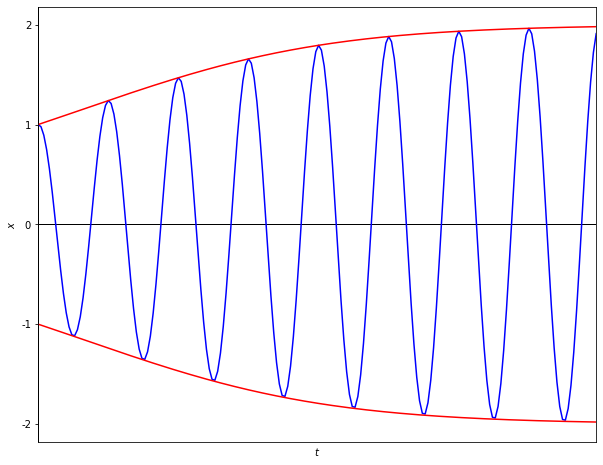

In [4]:
#Define the function for x
def x_function(eps, t):
    return (2 / np.sqrt(1 + 3 * np.exp(- eps * t))) * np.cos(t)

#Define the fucntion for the envelope, i.e. the first part of x
def r_envelope(eps, t):
    return 2 / np.sqrt(1 + 3 * np.exp(- eps * t))

#Declare parameter epsilon and list of t values
eps = 0.1
t_values = np.linspace(0, 50, 200)

#Format figure
plt.figure(figsize = (10, 8))
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

#Plot x and the r envelopes on both sides of the wave
plt.plot(t_values, x_function(eps, t_values), 'b')
plt.plot(t_values, r_envelope(eps, t_values), 'r')
plt.plot(t_values, -r_envelope(eps, t_values), 'r')

plt.xlabel(r'$t$')
plt.ylabel(r'$x$')

plt.xticks([], [])
plt.yticks(range(-2, 3), range(-2, 3))

plt.xlim([0, 50])

plt.show()

The solution is a cosine wave with an envelope (in red) increasing to 2 as $t \to \infty$.

**Example**: Duffing Equation $\ddot x + x + \varepsilon x^3 = 0$ (spring with cubic nonlinear term)

Here $h = x^3 = r^3 \cos^3{(t + \phi)}$ and $\dot r = \langle \varepsilon h \sin{(t + \phi)} \rangle = \langle \varepsilon \cos^3 \sin \rangle r^3 = 0 + O \left( \varepsilon^2 \right)$, so $r$ is constant at this order.

Note: The variables $r, \phi$ refer to the time averages but the bars are typically dropped.

Similarly $\dot \phi = \langle \varepsilon \frac{h}{r} \cos{(t + \phi)} \rangle = \varepsilon r^2 \langle \cos^4 \rangle + O \left( \varepsilon^2 \right) = \frac{3}{8} \varepsilon r^2 + O \left( \varepsilon^2 \right)$.

This can be expressed as $\dot \phi \approx \frac{3}{8} \varepsilon A^2$ where $A$ is the amplitude.

The angular frequancy is given by the derivative of the argument of the cosine term: $\omega = \frac{d}{dt} (t + \phi) = 1 + \dot \phi = 1 + \frac{3}{8} \varepsilon A^2$, so the frequency increases with the amplitude. Conversely, the period decreases.

## Lecture 12 – Bifurcations in 2D Systems (p. 244–)

Suppose $\exists$ a stable equilibrium point or a closed orbit.
> How can it vanish or change stability as a parameter is varied?

This lecture looks at prototypical examples (normal forms).

### I. Bifurcations of Fixed Points

These can be classed in terms of the associated eigenvalues:

#### a) $\lambda = 0$ Bifurcations (Saddle-Node, Transcritical, Pitchfork)

**Example 1**: Saddle-Node Bifurcation in the System $\dot x = a - x^2$ and $\dot y = - y$ (uncoupled).

The fixed points of the system are $(\sqrt{a}, 0), (-\sqrt{a}, 0)$ when $a > 0$ and coalesce at $a = 0$.

Jacobian $A = \left( \begin{matrix} -2x^* & 0 \\ 0 & -1 \end{matrix} \right)$, so $\lambda_1 = -2x^*$ and $\lambda_2 = -1$.

Thus, $(\sqrt{a}, 0)$ is a stable node, while $(-\sqrt{a}, 0)$ is a saddle point.

Try the little programme below!

Enter the value of parameter a: 2


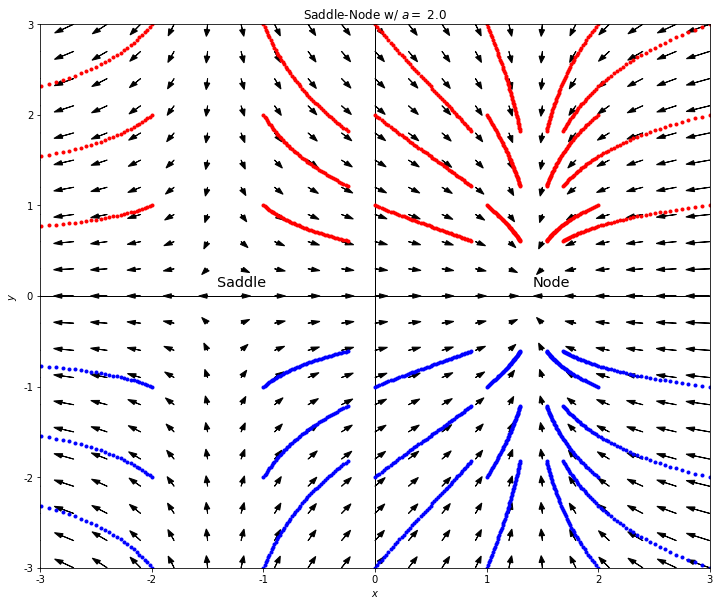

In [6]:
#Define the governing equation for the example system
def saddle_node(v):
    x_deriv = a - v[0]**2
    y_deriv = - v[1]
    
    return np.array([x_deriv, y_deriv])

#Ask for the parameter a 
a = float(input('Enter the value of parameter a: '))

#Plot the direction field of the system
st.plot_direction_field(saddle_node, -3, 3, 21)

#Plot multiple trajectories with different initial conditions
for x in range(-2, 4):
    for y in range(1, 4):
        st.plot_trajectory(saddle_node, [x, y], 50, dt = 0.01)
        st.plot_trajectory(saddle_node, [x, -y], 50, dt = 0.01, c = 'b')

#Constrain displayed dimensions
plt.xlim([-3, 3])
plt.ylim([-3, 3])

#Add commentary to the graph
if a > 0:
    plt.text(np.sqrt(a), 0.1, 'Node', size = 'x-large')
    plt.text(-np.sqrt(a), 0.1, 'Saddle', size = 'x-large')
elif a == 0:
    plt.text(np.sqrt(a), 0.1, 'Half-Stable', size = 'x-large')
else:
    plt.text(0, 0.1, 'Bottleneck', size = 'x-large')

plt.title(rf'Saddle-Node w/ $a = $ {a}')

plt.show()

**Example 2**: Transcritical Bifurcation in the System $\dot x = ax - x^2$ and $\dot y = -y$.

The system has the fixed points $(a, 0), (0, 0)$.

The Jacobian of the system is $A = \left( \begin{matrix} a - 2x^* & 0 \\ 0 & -1 \end{matrix} \right)$, so $\lambda_1 = a - 2x^*$ and $\lambda_2 = -1$.

Based on the classification presented in Lecture 5, one of the fixed points is a saddle point and the other a stable node. A transcritical bifurcation (exchange of stabilities) occurs at $a = 0$.

**Example 3**: Pitchfork (supercritical) in the System $\dot x = ax - x^3$ and $\dot y = -y$.

The system has three fixed points $(\pm \sqrt{a}, 0), (0, 0)$ for $a > 0$ but only one fixed point $(0, 0)$ for $a \leq 0$.

At $a = 0$ the stable node $(0, 0)$ splits into two new branches of symmetrical, stable nodes $(\pm \sqrt{a}, 0)$ and the origin becomes a saddle point.

#### b) $\lambda = \pm i\omega$ (Hopf Bifurcation) (p. 251–257)

Recall: If Re $\lambda_1$, Re $\lambda_2$ < 0, the fixed point is linearly stable. Alternatively, the eigenvalues are complex conjugates (p. 251–252).
> Bifurcation occurs when the eigenvalues cross into Re $\lambda$ > 0.

Equivalently, $\tau = 0$ and $\Delta > 0$.

**Supercritical Case**: Stable spiral $\rightarrow$ Unstable spiral surrounded by a low-amplitude, stable, nearly elliptical limit cycle

At the bifurcation $\lambda_1, \lambda_2 = \pm i \omega$.

**Example**: $\dot r = ar - r^3$ and $\dot \theta = \omega + br^2$ (polar cooridnates).

$r = 0$ is a fixed point for $\dot r = ar - r^3$, stable when $a \leq 0$ and unstable when $a > 0$.

For $a > 0$, there is also a stable fixed point $r = \sqrt{a}$ which is a stable limit cycle.

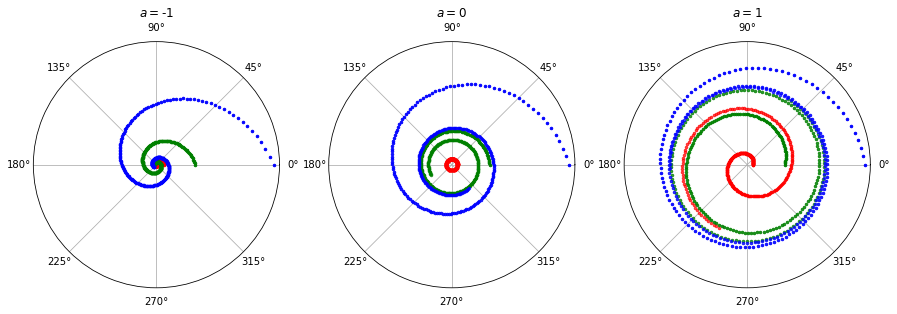

In [21]:
#Define the governing equations
def r_eq(r):
    return a * r - r**3

def theta_eq(theta):
    return omega + b * r**2

#Format subplots in polar projection
fig, ax = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': 'polar'})

#Define a list of values of parameter a
a_list = [-1, 0, 1]

#Define a list of marker colours and types
c = ['r.', 'g.', 'b.']

#Graph three instances of the system
for n in range(len(a_list)):
    #Declare parameter values
    a = a_list[n]
    b = 2
    omega = 3
    
    #Declare initial coordinates
    r_list = [0.1, 0.5, 1.5]
    
    #Define time step
    dt = 0.01
    
    count = 0
    
    for r in r_list:
        theta = 0
        for t in np.arange(0, 3, dt):
            ax[n].plot(theta, r, c[count], ms = 5, alpha = (10-t)/10)
        
           #Calculate the next values
            r = st.runge_kutta(r, r_eq, dt = 0.01)
            theta = st.runge_kutta(theta, theta_eq, dt = 0.01)
            
        count += 1
        
        #Stylise subplots
        ax[n].set_title(r'$a = $' + str(a))
        ax[n].set_rticks([])
        
plt.show()

At parameter values $a < 0$ all the trajectories follow a spiral to the stable fixed point at the origin (left). As $a$ approaches zero, the spiralling motion slows down (middle) until at $a > 0$ a limit cycle emerges and the origin turns into an unstable fixed point (right).

### II. Bifurcations of Periodic Orbits

#### a) Coalescence of Cycles
A.K.A. Saddle-Node Bifurcation of Cycles

#### b) SNIPER – Saddle-Node Infinite Period Bifurcation / SNIC – Saddle-Node on Invariant Circle

#### c) Homoclinic Bifurcation
Example of the above: forced pendulum.

**Next up**: Exercises ~6.5.13~, ~6.5.14~ (Phase Plane Analysis), 7.4.1 and 7.4.2 (Liénard Systems).

**Exercise 6.5.13**: Nonlinear Centres

The Duffing Equation $\ddot x + x + \varepsilon x^3 = 0$ can be interpreted as:

$\dot x = y$

$\dot y = - x - \varepsilon x^3 = -x \left( 1 + \varepsilon x^2 \right)$

The Jacobian of the system is then $A = \left( \begin{matrix} 0&1\\-1-2\varepsilon (x^*)^2&0 \end{matrix} \right)$, so at the origin $(0, 0)$ $A = \left( \begin{matrix} 0&1\\ -1&0 \end{matrix} \right)$.

Equivalently, $\Delta > 0$ and $\tau = 0$, which corresponds to a linear centre.

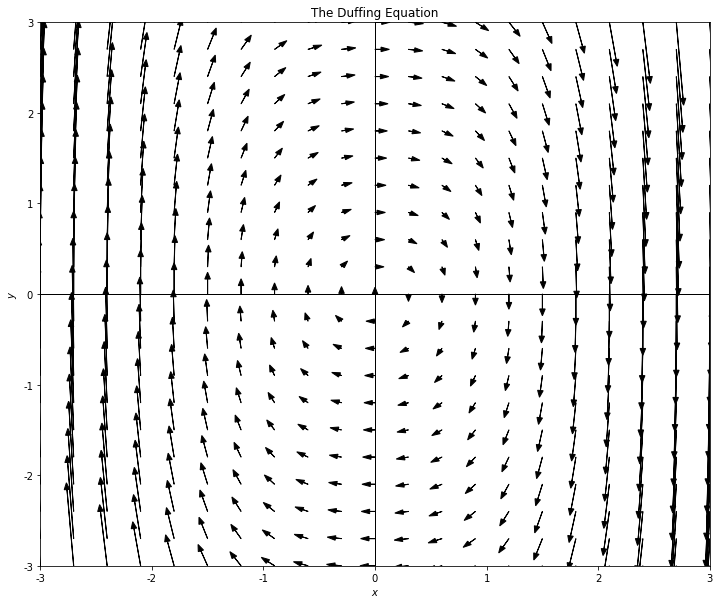

In [37]:
#Define the governing equations
def duffing(v):
    x_deriv = v[1]
    y_deriv = - v[0] - eps * v[0]**3
    
    return np.array([x_deriv, y_deriv])

#Declare the value of the epsilon parameter
eps = 2

#Plot the direction field of the system
st.plot_direction_field(duffing, -3, 3, 21)

plt.title('The Duffing Equation')
plt.xlim([-3, 3])
plt.ylim([-3, 3])

plt.show()

**a)** We apply Theorem 6.5.1 (p. 163)

The quantity $\frac{1}{2}\dot x^2 + \frac{1}{2}x^2 + \frac{1}{4} \varepsilon x^4$ is conserved, as $\frac{d}{dt} \left( \frac{1}{2}\dot x^2 + \frac{1}{2}x^2 + \frac{1}{4} \varepsilon x^4 \right) = \ddot x \dot x + x \dot x + \varepsilon x^3 \dot x = \dot x \left( \ddot x + x + \varepsilon x^3 \right) = 0$ where $\dot x = y$.

For $\varepsilon > 0$, the origin is a local minimum of the conserved quantity. Assuming the origin to be an isolated fixed point, all the trajectories close to the origin are closed and $(0, 0)$ is a nonlinear centre.

**b)** For $\varepsilon < 0$, the origin is a local maximum of the conserved quantity. Sufficiently close to the fixed point, Theorem 6.5.1 then still applies and the trajectories are closed. The system also has two additional fixed points $\left( \pm \sqrt{- \frac{1}{\varepsilon}}, 0 \right)$, so far from the origin the trajectories may behave differently.

**Exercise 6.5.14**: Glider

A glider flying at speed $v$ at an angle $\theta$ to the horizontal:

$\dot v = - \sin{\theta} - D v^2$

$v \dot \theta = - \cos{\theta} + v^2 \Rightarrow \dot \theta = - \frac{1}{v} \cos{\theta} + v$

**a)** For $D = 0$, $\frac{d}{dt} \left( v^3 - 3v \cos{\theta} \right) = 3 v^2 \dot v - 3 \dot v \cos{\theta} + 3v \dot \theta \sin{\theta} = - 3 v^2 \sin{\theta} + 3 \sin{\theta} \cos{\theta} - 3 \sin{\theta} \cos{\theta} + 3v^2 \sin{\theta} = 0$.

$\Rightarrow$ The quantity $v^3 - 3v \cos{\theta}$ is conserved.

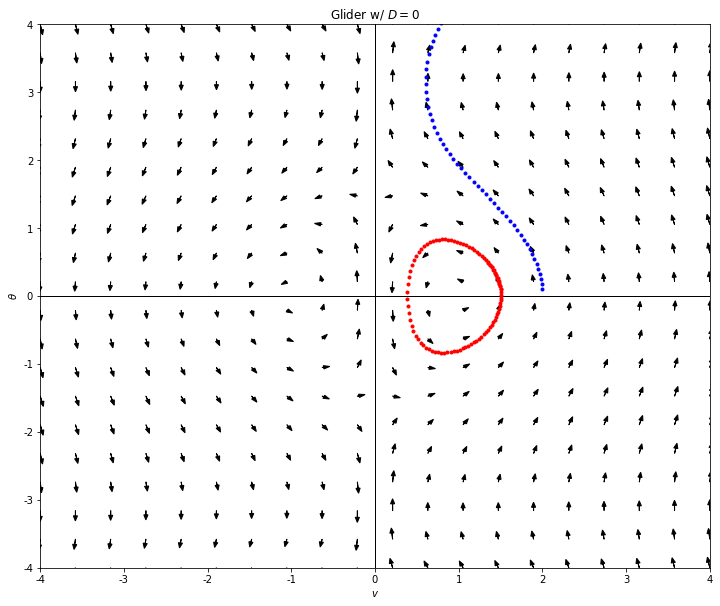

In [69]:
#Define the governing equations of the glider
def glider(v):
    v_deriv = - np.sin(v[1]) - D * v[0]**2
    theta_deriv = - (1/v[0]) * np.cos(v[1]) + v[0]
    
    return np.array([v_deriv, theta_deriv])

D = 0

st.plot_direction_field(glider, -4, 4, 20)

#Plot two trajectories with different initial conditions
st.plot_trajectory(glider, [1.5, 0.1], 100, dt = 0.05)
st.plot_trajectory(glider, [2, 0.1], 100, c = 'b', dt = 0.05)

plt.xlim([-4, 4])
plt.ylim([-4, 4])

#Format figure
plt.title(rf'Glider w/ $D =${D}')
plt.xlabel(r'$v$')
plt.ylabel(r'$\theta$')

plt.show()

For sufficiently low initial speeds, the glider will perform a bobbing motion akin to a somewhat lopsided sine wave(red). For higher speeds, the glider will advance in vertically aligned circles, analogous to a a roller coaster inversion (blue).

**b)** 

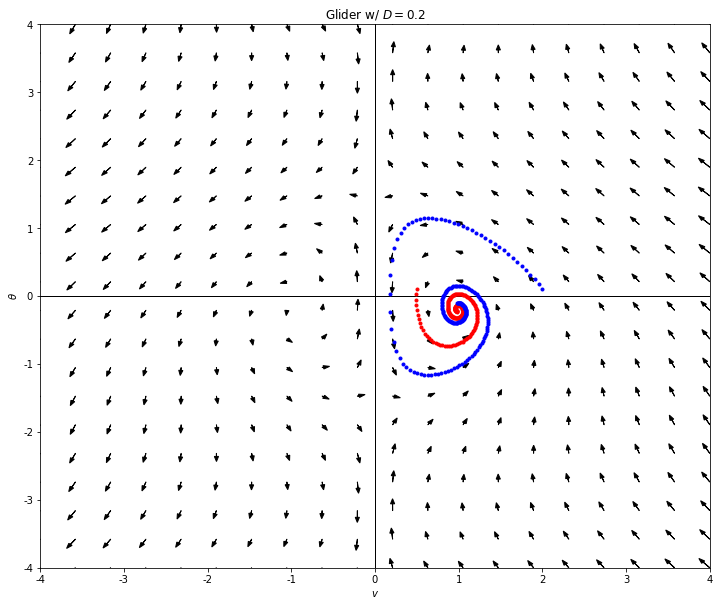

In [72]:
#Declare new value of drag parameter
D = 0.2

#Plot the direction field of the system
st.plot_direction_field(glider, -4, 4, 20)

#Plot two trajectories with different initial conditions
st.plot_trajectory(glider, [0.5, 0.1], 200, dt = 0.05)
st.plot_trajectory(glider, [2, 0.1], 200, c = 'b', dt = 0.05)

plt.xlim([-4, 4])
plt.ylim([-4, 4])

#Format figure
plt.title(rf'Glider w/ $D =${D}')
plt.xlabel(r'$v$')
plt.ylabel(r'$\theta$')

plt.show()

For positive drag ($D > 0$), the system gains a stable spiral in the $v > 0, \theta < 0$ region. This corresponds to the glider descending at a constant speed until hitting the ground.

**Next Actions**:
- [Lecture 13: Examples of Hopf Bifurcations](https://www.youtube.com/watch?v=qV0tCroLOHk&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=13)
- Read the last chapter of *Sync*
- Do exercises 7.4.1 and 7.4.2
- Begin Interim Reflective Report